In [1]:
from astroquery.eso import Eso
from astropy.coordinates import SkyCoord
import time 
import matplotlib.pyplot as plt

In [2]:
def time_function(func, iterations=10, *args, **kwargs):
    """
    Times the execution of a function over a specified number of iterations.
    
    Parameters:
        func (callable): The function to time.
        iterations (int): Number of times to run the function.
        *args: Positional arguments to pass to the function.
        **kwargs: Keyword arguments to pass to the function.
        
    Returns:
        A tuple containing:
            - The result of the last function call.
            - The average execution time per call in seconds.
            - A list of execution times for each iteration.
    """
    times = []
    result = None

    for i in range(iterations):
        start_time = time.perf_counter()  # More precise than time.time()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        elapsed = end_time - start_time
        times.append(elapsed)
        # print(f"Iteration {i+1}: {elapsed:.6f} seconds")

    # Plot time vs iteration
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, iterations + 1), times, marker='o', linestyle='-', color='b')
    plt.title("Execution Time per Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Time (seconds)")
    plt.grid(True)
    plt.show()

    average_time = sum(times) / iterations
    print(f"Average time over {iterations} iterations: {average_time:.6f} seconds")
    return result, average_time, times

In [3]:
eso = Eso()

In [4]:
ra = 266.42
dec = -29.01
radius = 0.2

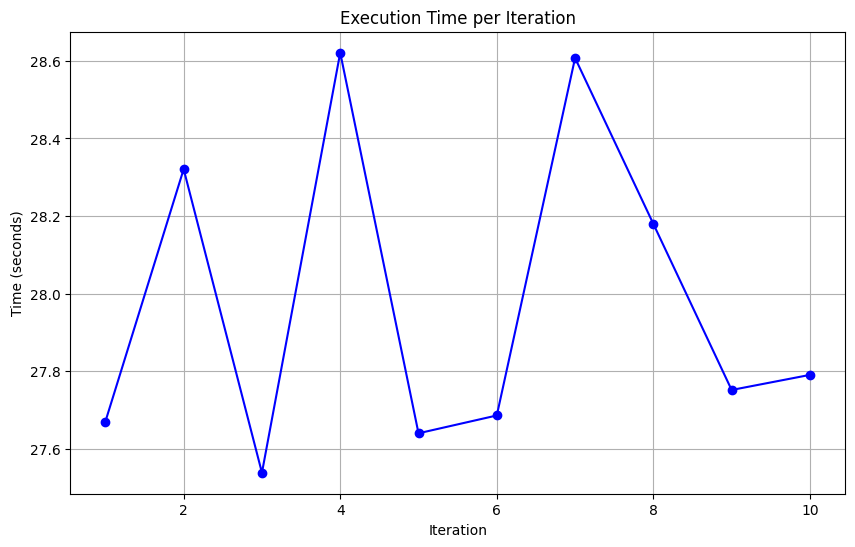

Average time over 10 iterations: 27.980643 seconds


In [9]:
result, avg_time, times = time_function(eso.query_instrument, 10, 'XSHOOTER', ra=ra, dec=dec, radius=radius, cache=False)

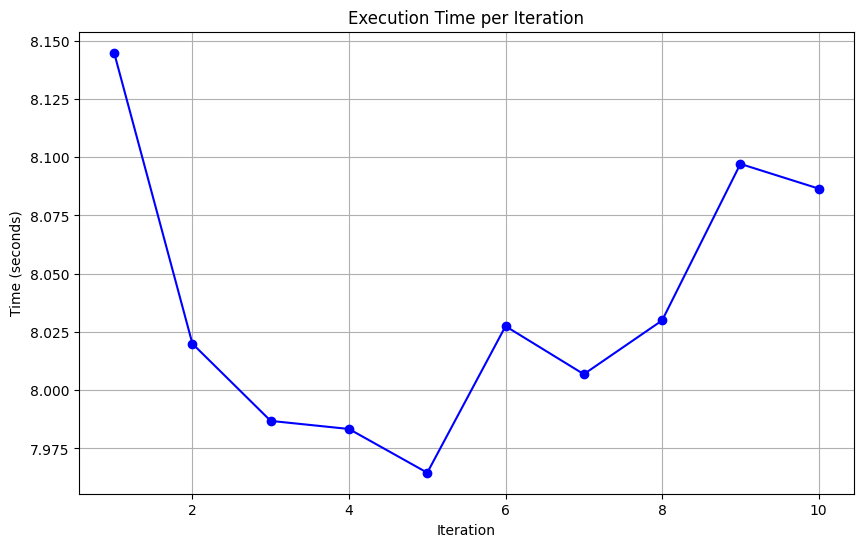

Average time over 10 iterations: 8.034739 seconds


In [10]:
result, avg_time, times = time_function(eso.query_collections, 10, 'XSHOOTER', ra=ra, dec=dec, radius=radius, cache=False)

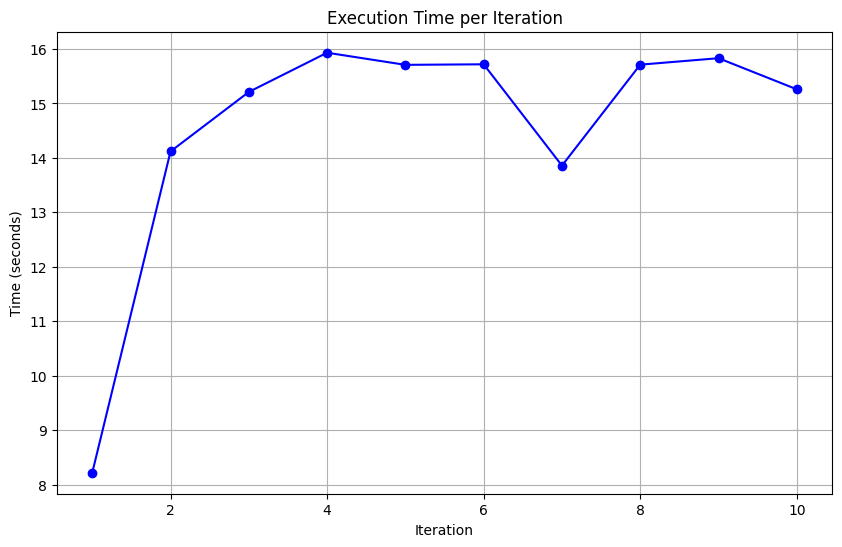

Average time over 10 iterations: 14.556675 seconds


In [11]:
tap_query = f"""
            SELECT TOP 50 * 
                FROM ivoa.obscore
                    WHERE instrument_name = 'XSHOOTER'
                    AND INTERSECTS(s_region, CIRCLE('ICRS', {ra}, {dec}, {radius})) = 1
            """

result, avg_time, times = time_function(eso.query_tap_service, 10, tap_query, cache=False)

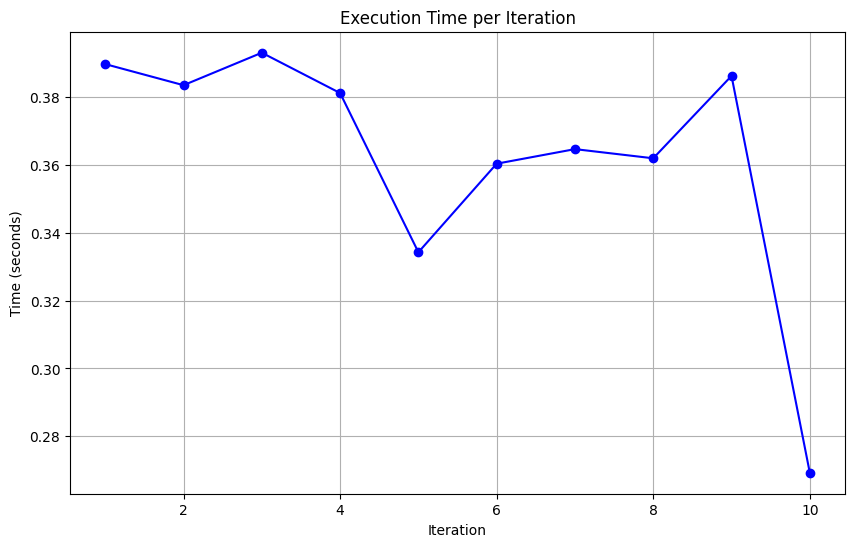

Average time over 10 iterations: 0.362439 seconds


In [12]:
tap_query = f"""
            SELECT * 
                FROM ivoa.obscore
                    WHERE instrument_name = 'XSHOOTER'
                    AND INTERSECTS(s_region, CIRCLE('ICRS', {ra}, {dec}, {radius})) = 1
            """

result, avg_time, times = time_function(eso.query_tap_service, 10, tap_query, cache=False)